#### 사전준비

In [33]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### MNIST 다운로드

In [35]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [36]:
(train_input, train_target), (test_input, test_target) = load_data()

In [37]:
print((train_input.shape, train_target.shape))
print((test_input.shape, test_target.shape))

((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [38]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0

In [39]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax =axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap="gray_r")
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()

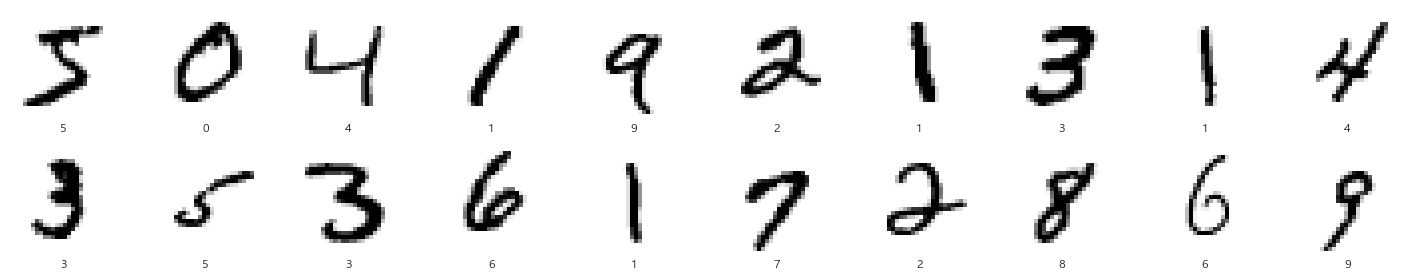

In [40]:
show_images(train_input, train_target, 2, 10)

In [41]:
model = keras.Sequential(name="CNN")

model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1000, activation="relu", name="hidden"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation="softmax", name="softmax"))
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 1000)              3137000 

In [42]:
# 255.0 나눠서 0~1로 값 축소하는 일은 하지않음
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/best_cnn_model2.h5",save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target), batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 1.0478 - accuracy: 0.9377
Epoch 1: val_loss improved from inf to 0.06010, saving model to ./data\best_cnn_model2.h5
600/600 [==============================] - 44s 72ms/step - loss: 1.0478 - accuracy: 0.9377 - val_loss: 0.0601 - val_accuracy: 0.9799
Epoch 2/20
600/600 [==============================] - ETA: 0s - loss: 0.0564 - accuracy: 0.9824
Epoch 2: val_loss improved from 0.06010 to 0.04053, saving model to ./data\best_cnn_model2.h5
600/600 [==============================] - 48s 79ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0405 - val_accuracy: 0.9867
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9866
Epoch 3: val_loss did not improve from 0.04053
600/600 [==============================] - 44s 73ms/step - loss: 0.0422 - accuracy: 0.9866 - val_loss: 0.0489 - val_accuracy: 0.9853
Epoch 4/20
600/600 [==============================] - ETA: 0s - loss: 0.0355 - acc

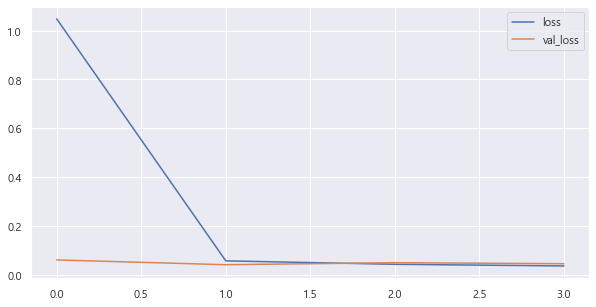

In [51]:
plot_target = ["loss", "val_loss"]
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

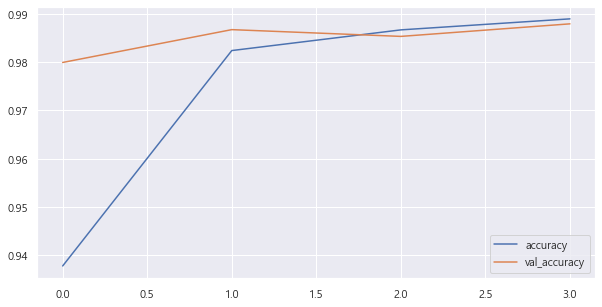

In [52]:
plot_target = ["accuracy", "val_accuracy"]
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [45]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.0405 - accuracy: 0.9867


[0.040530670434236526, 0.9866999983787537]

In [53]:
# 예측된 결과값 리스트
pred_result = model.predict(test_input)

313/313 [==============================] - 2s 8ms/step


array([[1.5812469e-11, 4.6953663e-10, 8.0606233e-10, ..., 9.9999988e-01,
        1.7977921e-11, 1.6135413e-08],
       [6.1237815e-10, 4.5412722e-07, 9.9999952e-01, ..., 1.2678051e-11,
        5.8876272e-12, 1.7376385e-13],
       [9.2812091e-10, 9.9999630e-01, 1.3177226e-09, ..., 2.7400782e-07,
        5.6443068e-09, 2.2902880e-09],
       ...,
       [1.8100726e-18, 1.2199154e-12, 3.7738127e-17, ..., 9.5432278e-13,
        2.6926191e-12, 9.1380384e-12],
       [8.5552596e-09, 5.2615860e-11, 3.0663267e-09, ..., 5.1370410e-09,
        5.5100541e-03, 5.1121901e-07],
       [1.5700222e-07, 9.4074554e-11, 3.5509595e-10, ..., 1.3335766e-11,
        3.5008132e-09, 2.0467820e-10]], dtype=float32)

In [47]:
pred_labels = np.argmax(pred_result, axis=-1)
print(pred_labels[:10])
print(pred_labels.shape)

[7 2 1 0 4 1 4 9 5 9]
(10000,)


#### 예측 실패한 이미지 파악

In [48]:
wrong_result = []

for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)

133

In [49]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

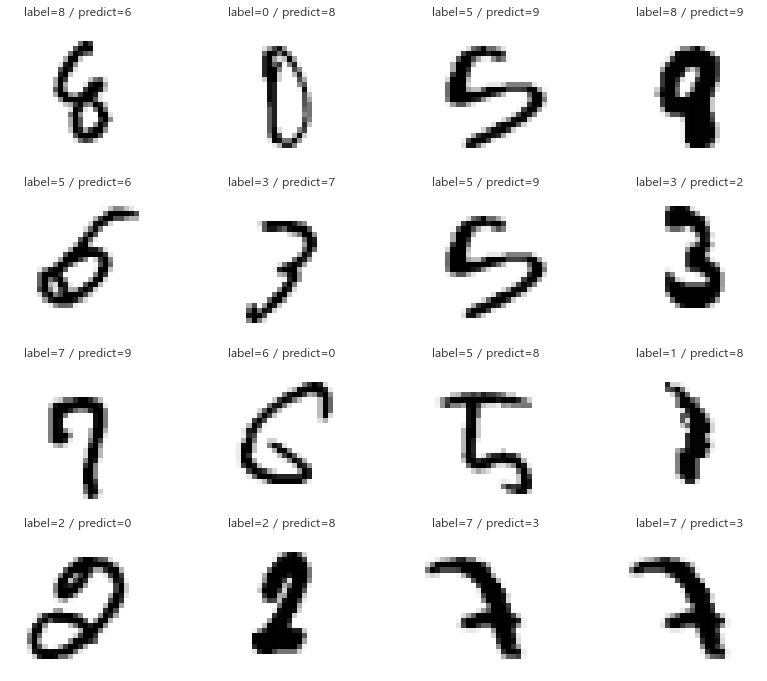

In [50]:
# 예측 실패한 이미지 확인
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(test_input[n].reshape(28,28), cmap="gray_r", interpolation="nearest")
    plt.title(f"label={test_target[n]} / predict={pred_labels[n]}")
    plt.axis("off")
plt.show()